In [ ]:
!pip install xlrd==1.2.0
import xlrd
!pip install openpyxl==3.0.0
import openpyxl

In [ ]:
%load_ext rpy2.ipython

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats
import math



sns.set_palette("Set2")

In [ ]:
%%R
install.packages("AMR")
install.packages("readr")
install.packages("readxl")
install.packages("devtools")
install.packages("ggplot2")

library(AMR)
library(readr)
library(readxl)
library(devtools)
library(ggplot2)


In [ ]:
%%R
install.packages("aod")
library(aod)

In [57]:
url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/dane_uzupelnione.xlsx')
df = pd.read_excel(url_data)
df.rename(columns={' workforce': 'workforce'}, inplace=True)
df.rename(columns={'tax revenue': 'tax_revenue'}, inplace=True)
df.rename(columns={'expected number of years of life ': 'expected number of years of life'}, inplace=True)

df.to_excel(r'df.xlsx', index = False)

In [58]:
url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/numeryczne.xlsx')

df_numeryczne = pd.read_excel(url_data)
df_numeryczne.rename(columns={'expected number of years of life ': 'expected number of years of life'}, inplace=True)
df.to_excel(r'df_num.xlsx', index = False)

In [59]:
%%R
df <- read_excel("df.xlsx")
df_numeryczne <- read_excel("df_num.xlsx")

In [78]:
url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/dane_grupy_UE.xlsx')
df.rename(columns={'Gini coefficient': 'Gini_coefficient'}, inplace=True)

df_UE = pd.read_excel(url_data)
df_UE.to_excel(r'df_UE.xlsx', index = False)

url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/df_nazwyok.xlsx')
df_nazwyok = pd.read_excel(url_data)
df_nazwyok.to_excel(r'df_nazwyok.xlsx', index = False)


In [79]:
%%R
df_UE <- read_excel("df_UE.xlsx")
df_nazwyok <- read_excel("df_nazwyok.xlsx")

In [ ]:
df.isnull().sum()

country                                  0
year                                     0
Gini coefficient                         0
unemployment                             0
GDP pc                                   0
female workforce                         0
tax_revenue                              0
expected number of years of education    0
FDI                                      0
expected number of years of life         0
workforce                                0
globalization                            0
financialization                         0
membership of the EU                     0
number of years in the EU                0
CIT                                      0
population                               0
FTW                                      0
dtype: int64

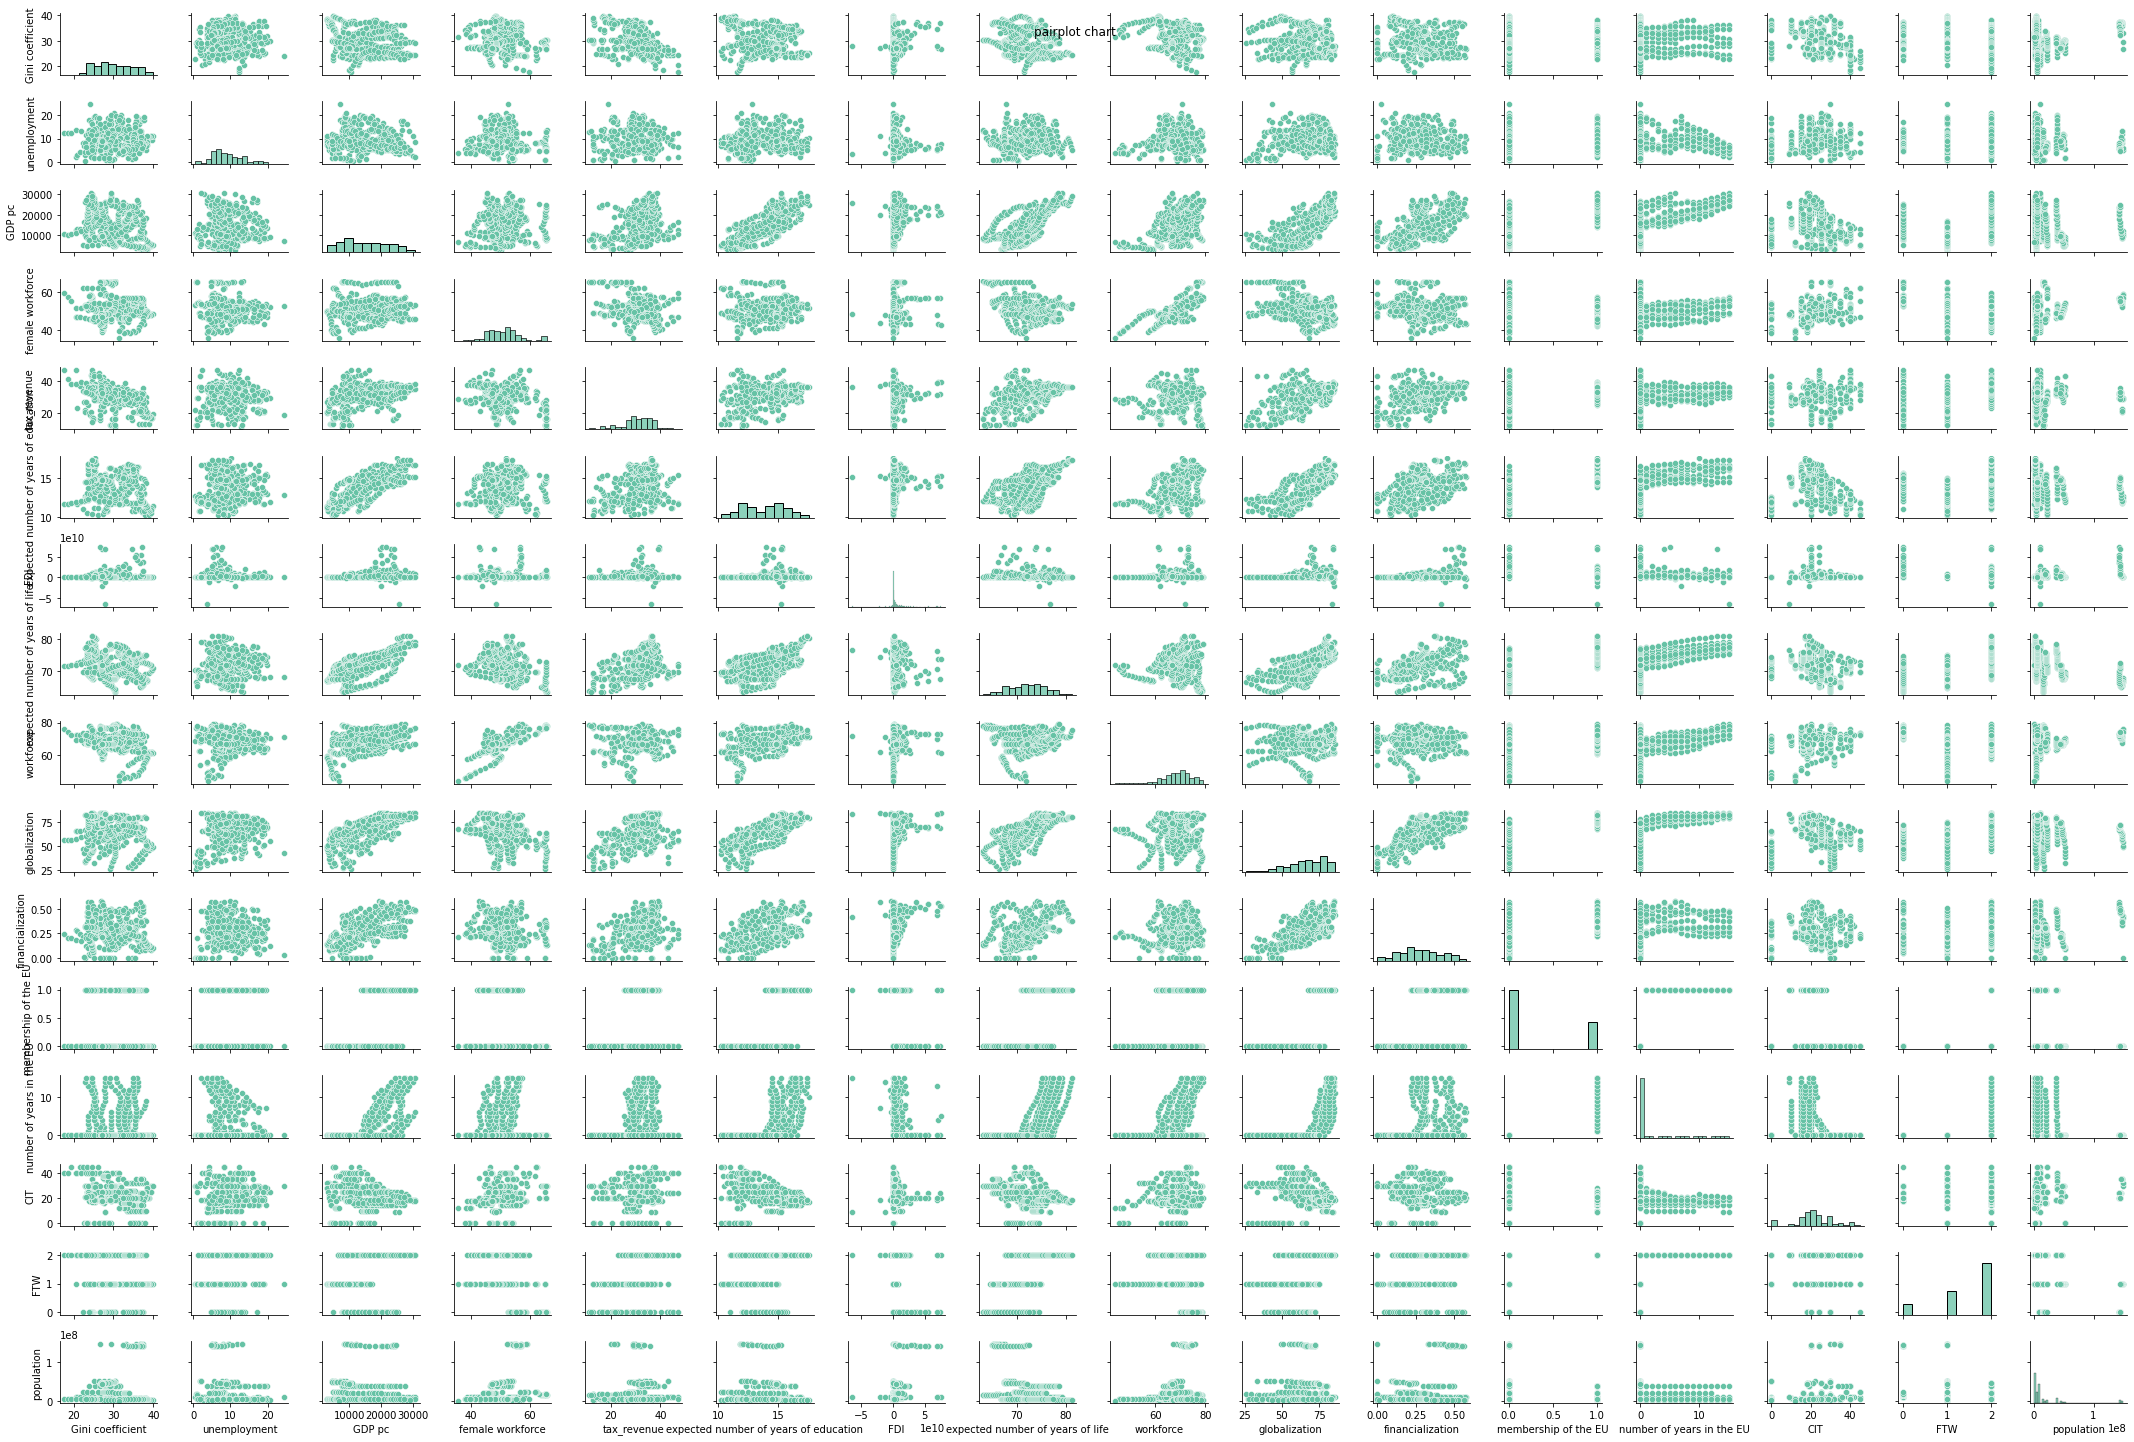

In [ ]:
g=sns.pairplot(df, x_vars=["Gini coefficient", "unemployment", "GDP pc", "female workforce", "tax_revenue", "expected number of years of education", "FDI", "expected number of years of life", "workforce", "globalization", "financialization", "membership of the EU", "number of years in the EU", "CIT", "FTW", "population"], 
y_vars=["Gini coefficient", "unemployment", "GDP pc", "female workforce", "tax_revenue", "expected number of years of education", "FDI", "expected number of years of life", "workforce", "globalization", "financialization", "membership of the EU", "number of years in the EU", "CIT", "FTW", "population"])
g.fig.suptitle("pairplot chart")
g.fig.set_size_inches(30,20)

In [ ]:
df.corr()

,year,Gini coefficient,unemployment,GDP pc,female workforce,tax_revenue,expected number of years of education,FDI,expected number of years of life,workforce,globalization,financialization,membership of the EU,number of years in the EU,CIT,population,FTW
year,1.000000,0.141330,-0.095985,0.630150,-0.093420,0.062793,0.703665,0.191341,0.557020,0.079935,0.732570,0.435794,0.581102,0.621488,-0.375430,-0.012067,0.047203
Gini coefficient,0.141330,1.000000,0.107747,-0.256930,-0.081383,-0.490327,-0.138460,0.072543,-0.269754,-0.284228,-0.045318,-0.113552,0.029626,-0.003862,-0.217210,0.201133,-0.074834
unemployment,-0.095985,0.107747,1.000000,-0.163775,-0.057475,-0.065877,-0.078265,-0.139942,0.018001,-0.041527,0.040528,-0.063542,-0.059571,-0.127214,0.175751,-0.137529,0.171382
GDP pc,0.630150,-0.256930,-0.163775,1.000000,0.053935,0.370489,0.810135,0.234225,0.735063,0.435213,0.707306,0.661643,0.668179,0.652160,-0.227374,-0.040021,0.297614
female workforce,-0.093420,-0.081383,-0.057475,0.053935,1.000000,-0.265342,0.036044,0.034467,-0.371609,0.781190,-0.351869,-0.202488,-0.151350,-0.055548,0.247010,0.204149,-0.492743
tax_revenue,0.062793,-0.490327,-0.065877,0.370489,-0.265342,1.000000,0.323931,0.094687,0.406688,0.053942,0.432550,0.441248,0.162047,0.152629,0.052248,0.014575,0.357830
expected number of years of education,0.703665,-0.138460,-0.078265,0.810135,0.036044,0.323931,1.000000,0.174491,0.601671,0.381694,0.747217,0.526604,0.687254,0.618359,-0.231259,-0.057122,0.307220
FDI,0.191341,0.072543,-0.139942,0.234225,0.034467,0.094687,0.174491,1.000000,-0.004327,0.062199,0.205230,0.385395,0.079801,0.015394,-0.019369,0.432430,-0.158450
expected number of years of life,0.557020,-0.269754,0.018001,0.735063,-0.371609,0.406688,0.601671,-0.004327,1.000000,0.027304,0.731447,0.526667,0.654262,0.641711,-0.257986,-0.344015,0.593602
workforce,0.079935,-0.284228,-0.041527,0.435213,0.781190,0.053942,0.381694,0.062199,0.027304,1.000000,0.045522,0.052513,0.165476,0.258729,0.205552,0.150876,-0.145129


In [ ]:
df.rename(columns={'Gini coefficient': 'Gini_coefficient'}, inplace=True)
df.to_excel(r'df.xlsx', index = False)

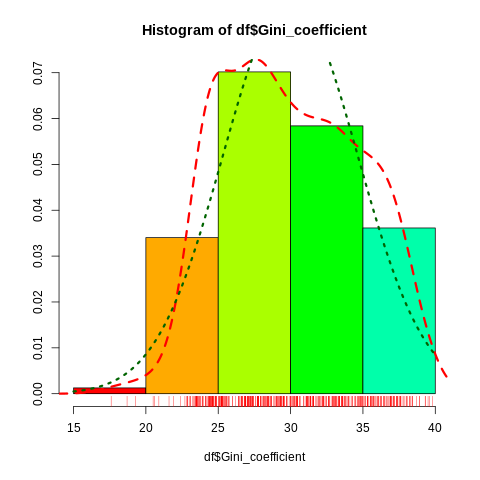

In [ ]:
%%R
df <- read_excel("df.xlsx")
hist(df$Gini_coefficient, breaks=7, col=rainbow(9),ylab="",
     probability=T)
rug(df$Gini_coefficient,col="red")
lines(density(df$Gini_coefficient),lty=2, lwd=3, col="red")
curve(dnorm(x, mean = mean(df$Gini_coefficient), sd =sd(df$Gini_coefficient)) , add=T , col="darkgreen", lty=3, lwd =3) 

In [ ]:
%%R
skewness <- skewness(df$Gini_coefficient) 
kurtosis <- kurtosis(df$Gini_coefficient)
skwe_kurt <- c(skewness, kurtosis)
skwe_kurt

[1] 0.1164745 2.0690853


# WIZUALIZACJA


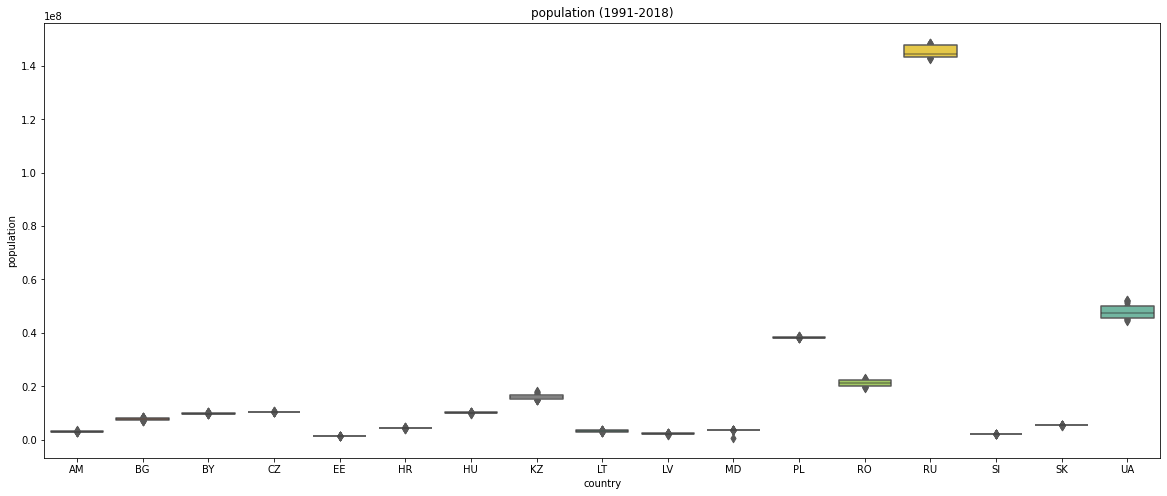

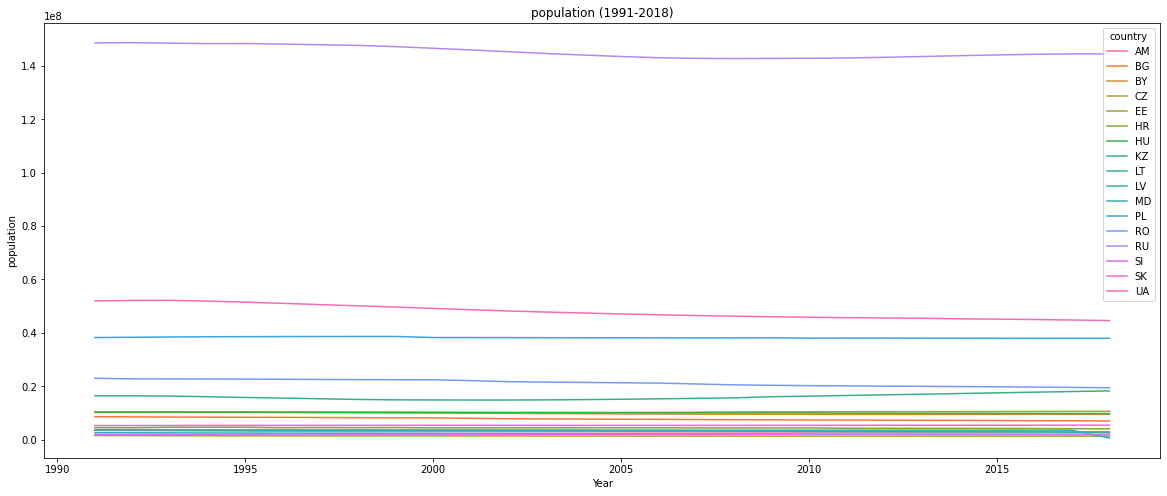

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("population (1991-2018)")
sns.boxenplot(x=df['country'], y=df["population"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("population (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["population"], hue=df["country"], legend=True, ci=None)
plt.ylabel('population')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

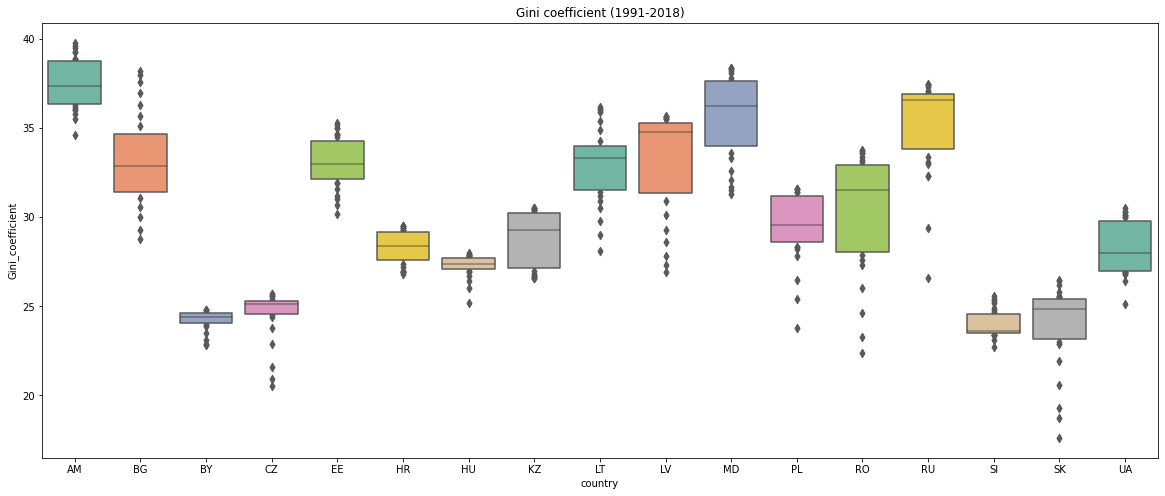

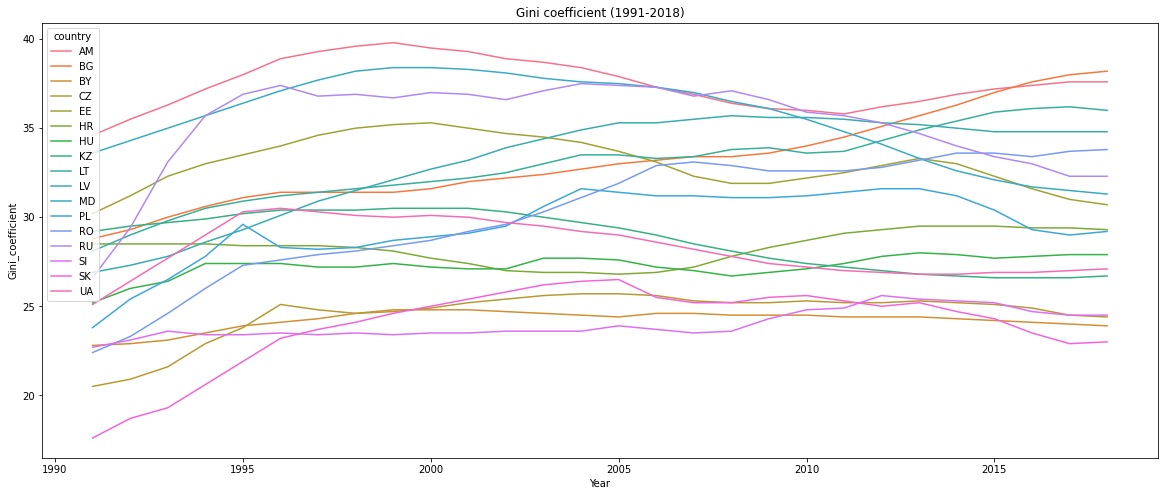

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Gini coefficient (1991-2018)")
sns.boxenplot(x=df['country'], y=df["Gini_coefficient"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("Gini coefficient (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["Gini_coefficient"], hue=df["country"], legend=True, ci=None)
plt.ylabel('Gini_coefficient')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

TypeError: ignored

R[write to console]: `geom_smooth()` using formula 'y ~ x'



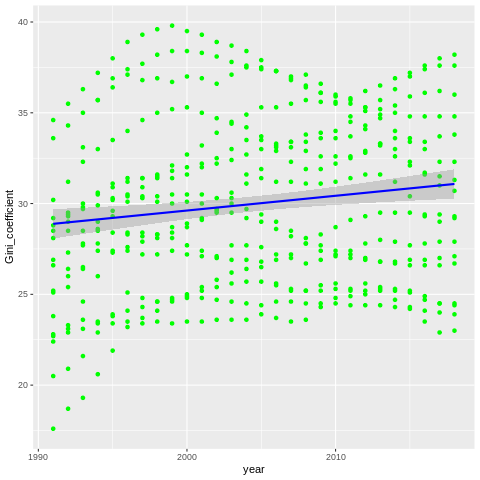

In [ ]:
%%R

bapt.lm <- lm(Gini_coefficient ~ year, data = df)
summary(bapt.lm)


bapt.graph<-ggplot(df, aes(x=year, y=Gini_coefficient))+
                        geom_point(col="green")+ 
            geom_smooth(method="lm", col="blue")
bapt.graph

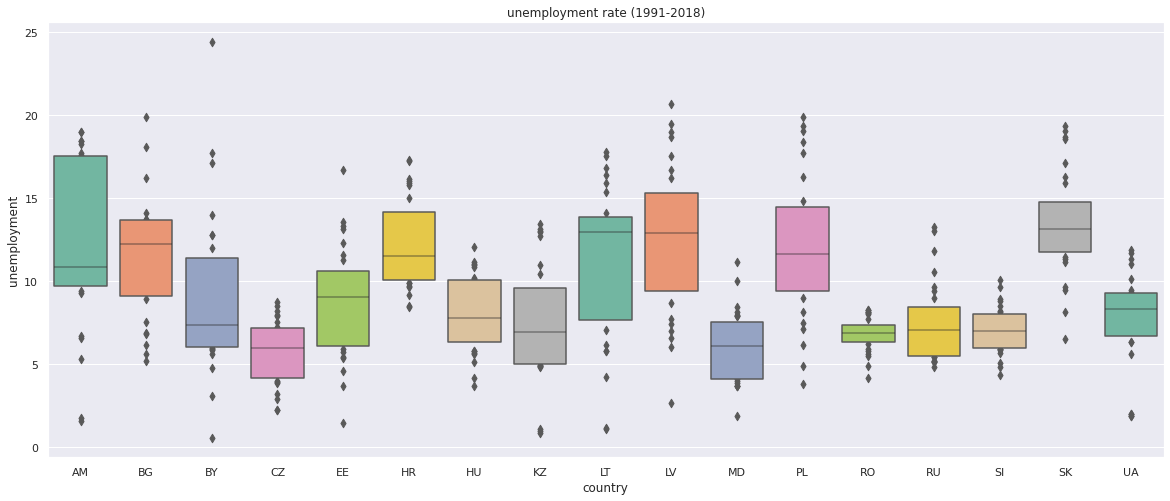

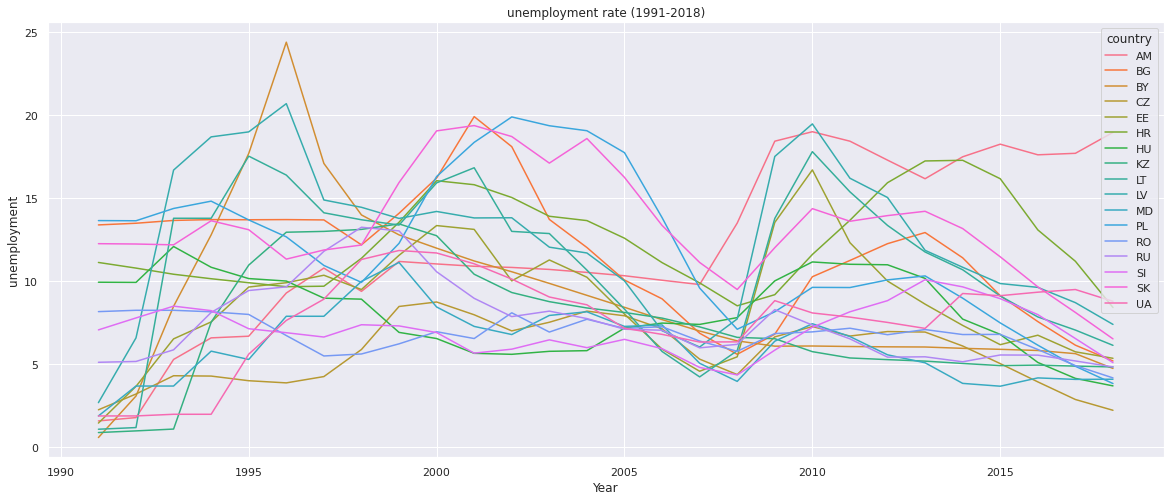

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("unemployment rate (1991-2018)")
sns.boxenplot(x=df['country'], y=df["unemployment"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("unemployment rate (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["unemployment"], hue=df["country"], legend=True, ci=None)
plt.ylabel('unemployment')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

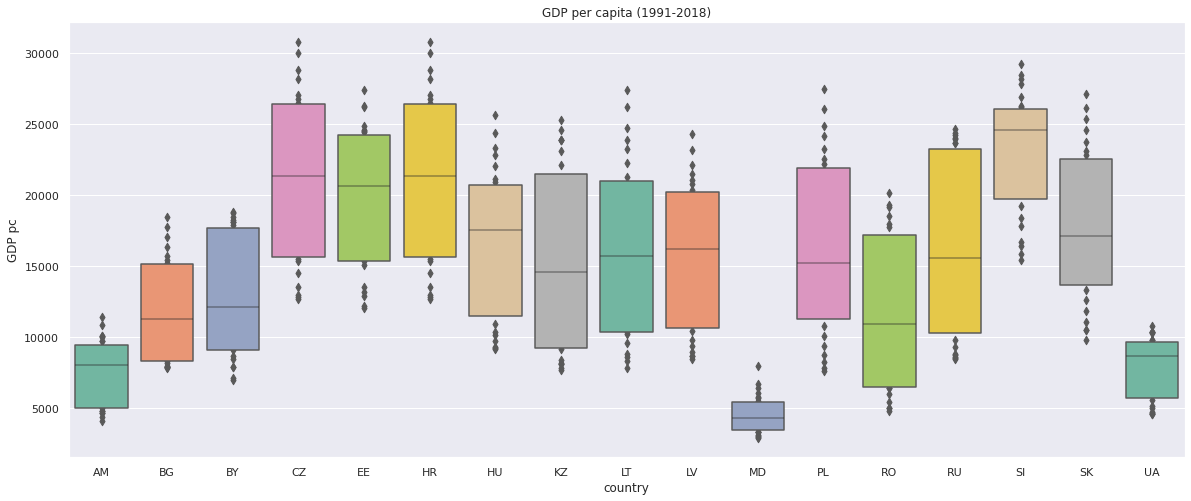

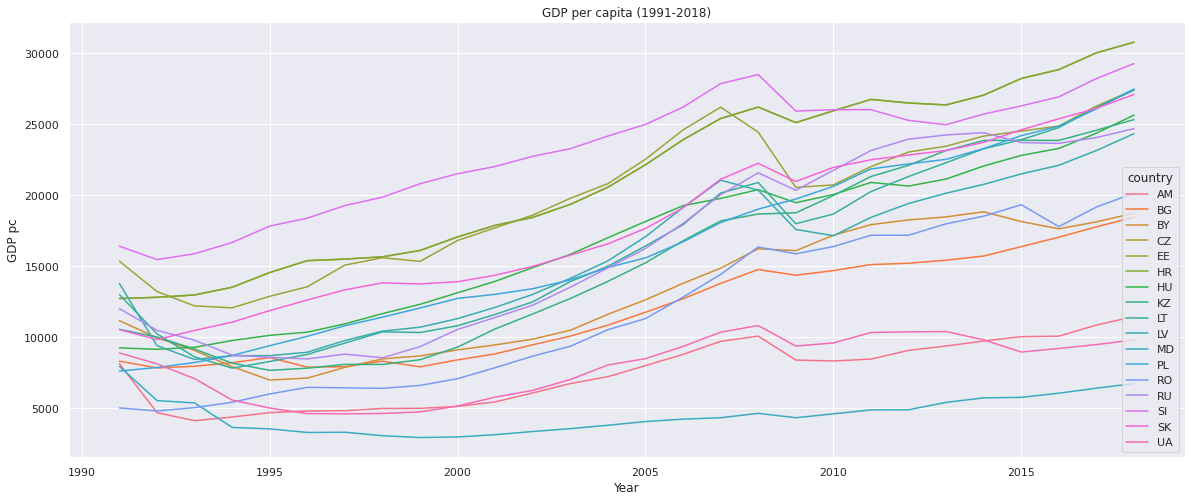

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("GDP per capita (1991-2018)")
sns.boxenplot(x=df['country'], y=df["GDP pc"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("GDP per capita (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["GDP pc"], hue=df["country"], legend=True, ci=None)
plt.ylabel('GDP pc')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

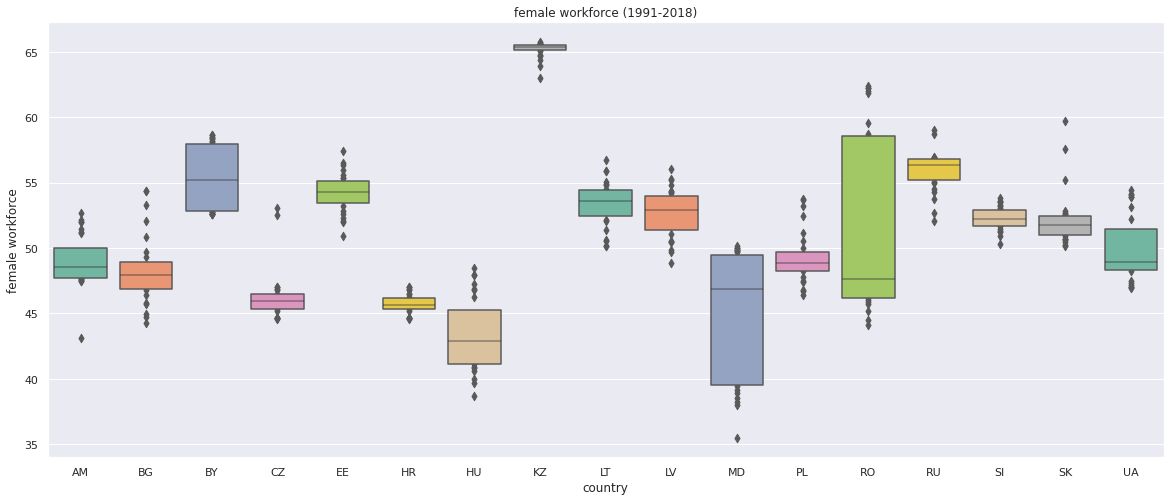

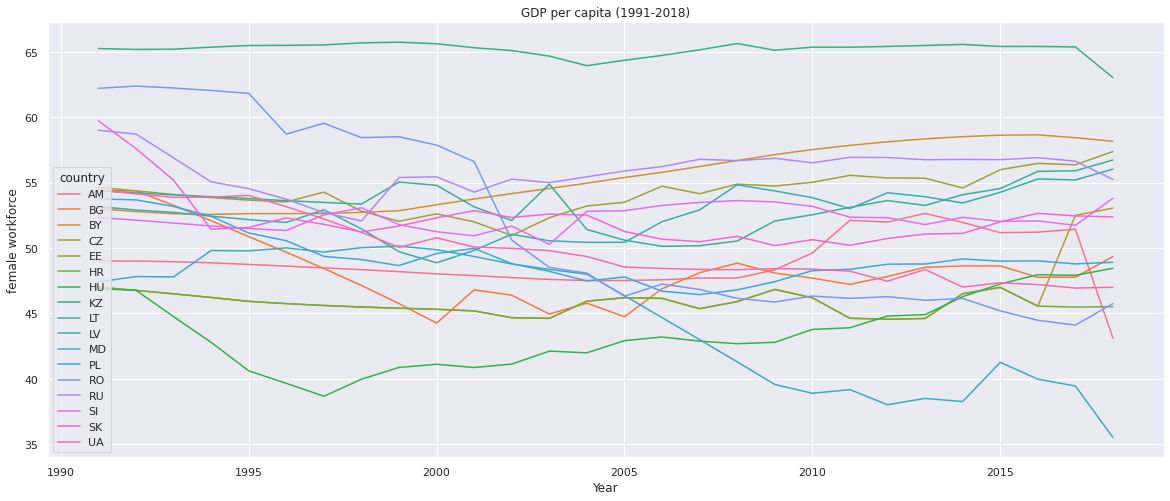

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("female workforce (1991-2018)")
sns.boxenplot(x=df['country'], y=df["female workforce"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("GDP per capita (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["female workforce"], hue=df["country"], legend=True, ci=None)
plt.ylabel('female workforce')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

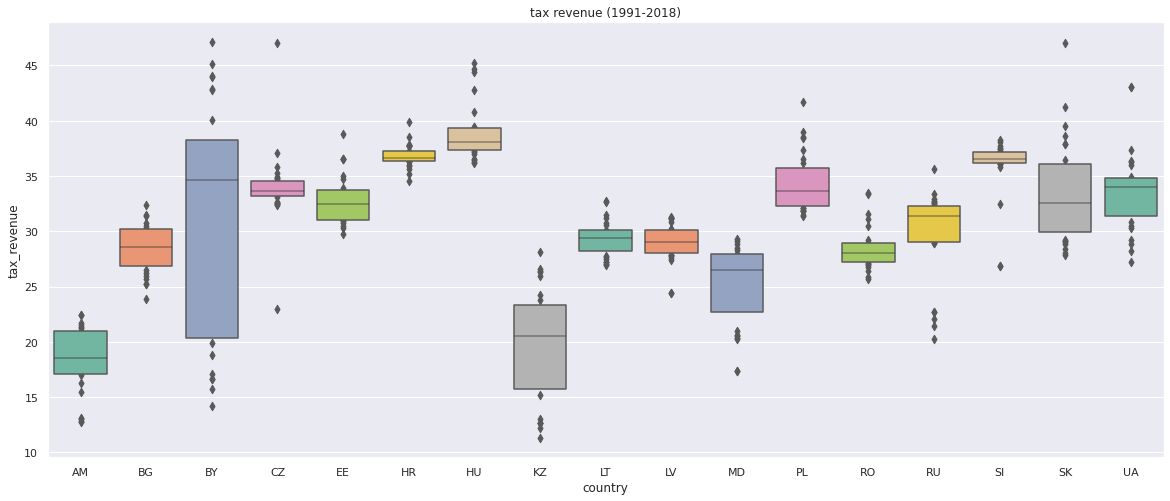

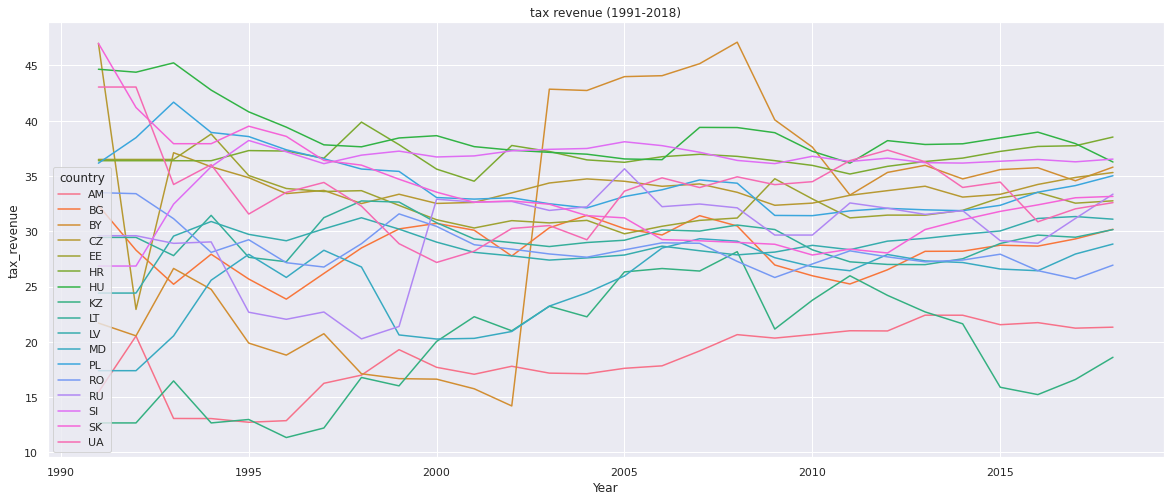

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("tax revenue (1991-2018)")
sns.boxenplot(x=df['country'], y=df["tax_revenue"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("tax revenue (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["tax_revenue"], hue=df["country"], legend=True, ci=None)
plt.ylabel('tax_revenue')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

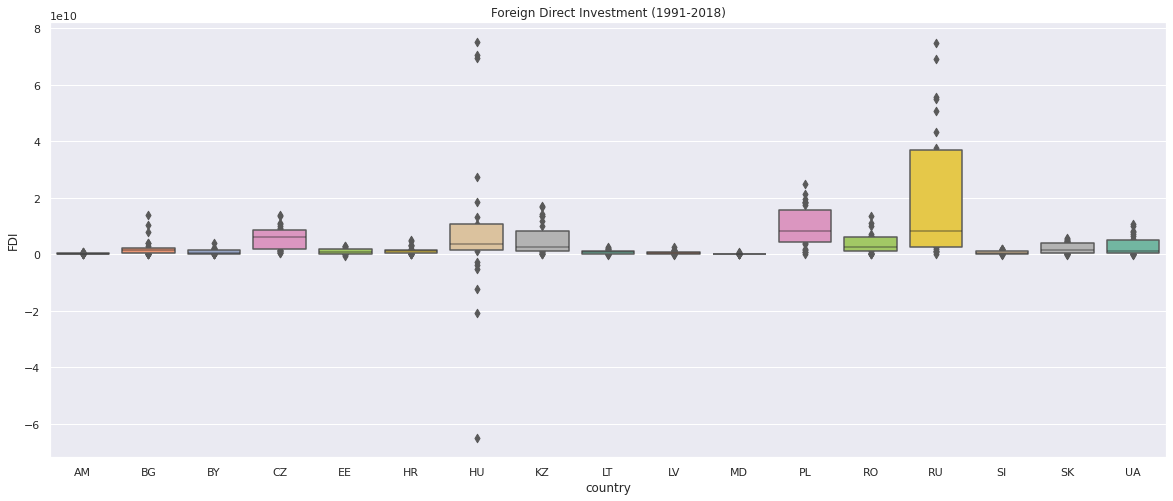

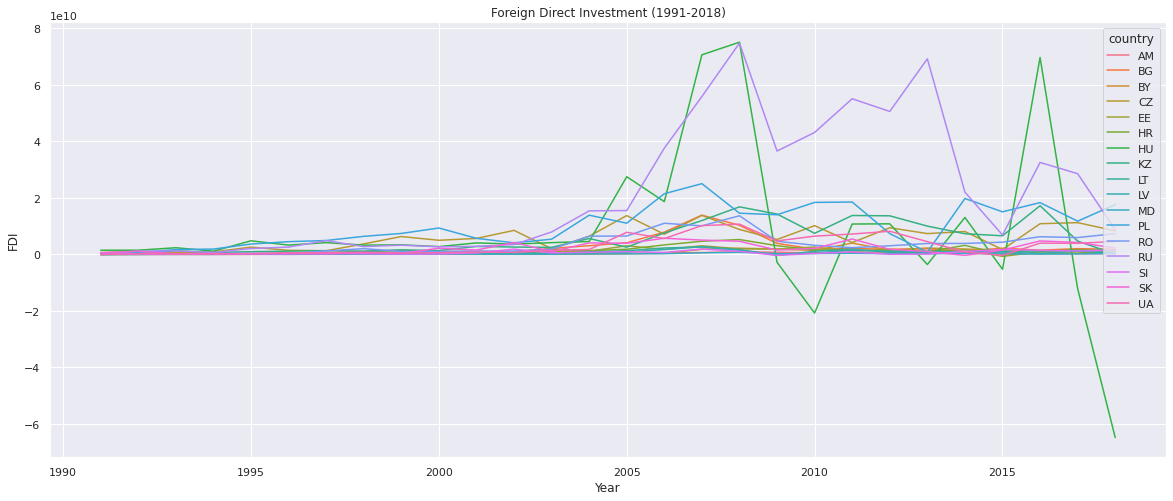

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Foreign Direct Investment (1991-2018)")
sns.boxenplot(x=df['country'], y=df["FDI"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("Foreign Direct Investment (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["FDI"], hue=df["country"], legend=True, ci=None)
plt.ylabel('FDI')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

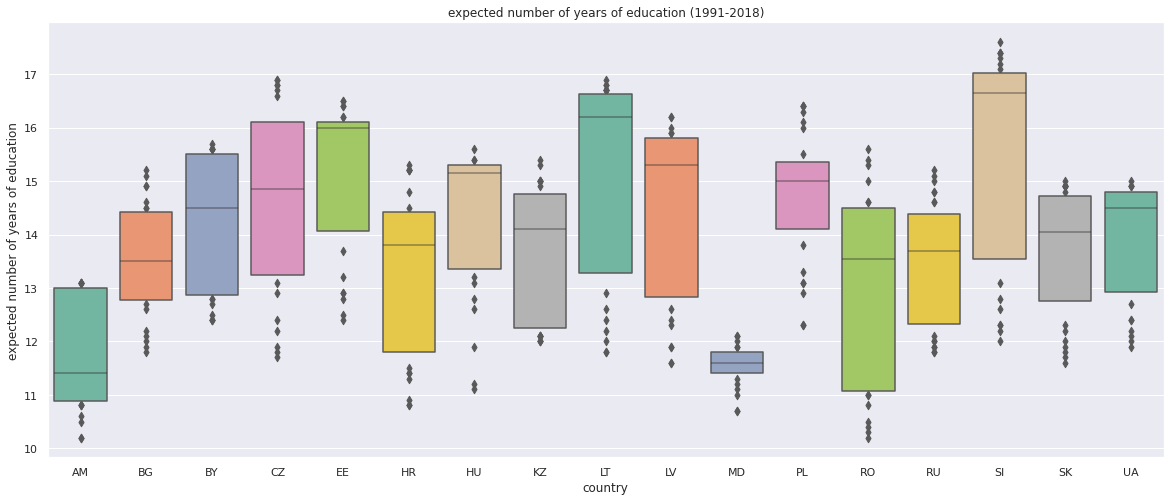

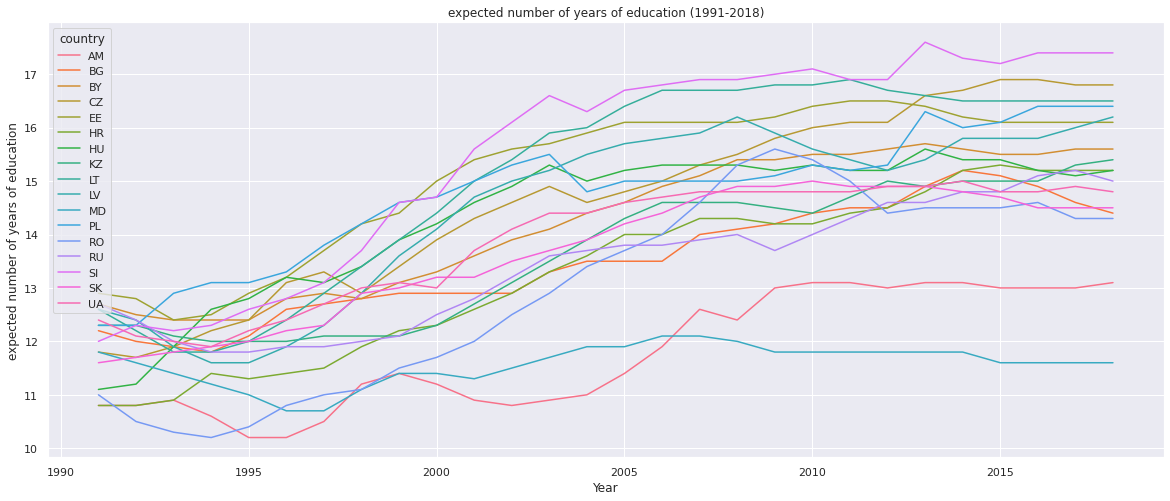

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("expected number of years of education (1991-2018)")
sns.boxenplot(x=df['country'], y=df["expected number of years of education"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("expected number of years of education (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["expected number of years of education"], hue=df["country"], legend=True, ci=None)
plt.ylabel('expected number of years of education')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

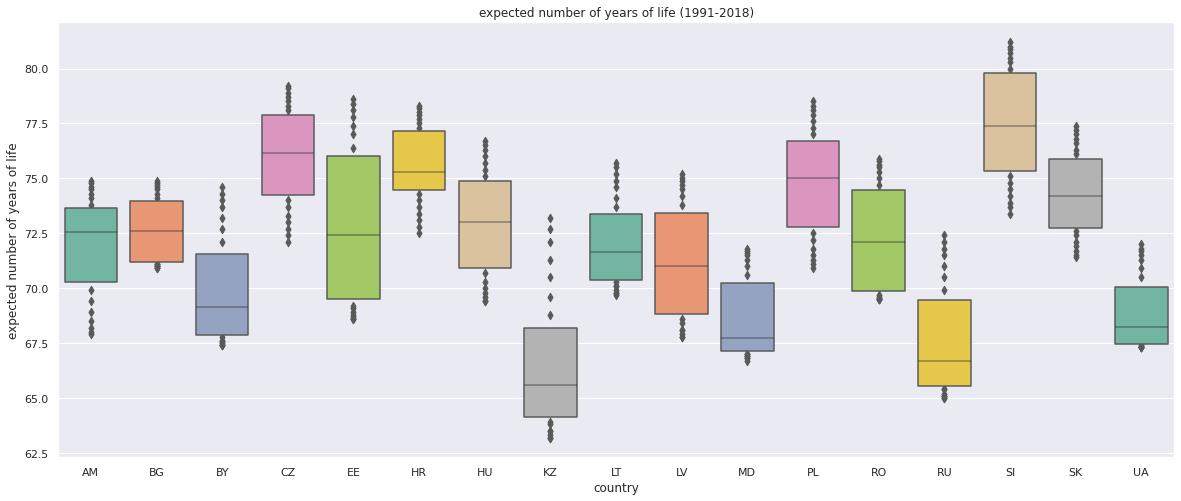

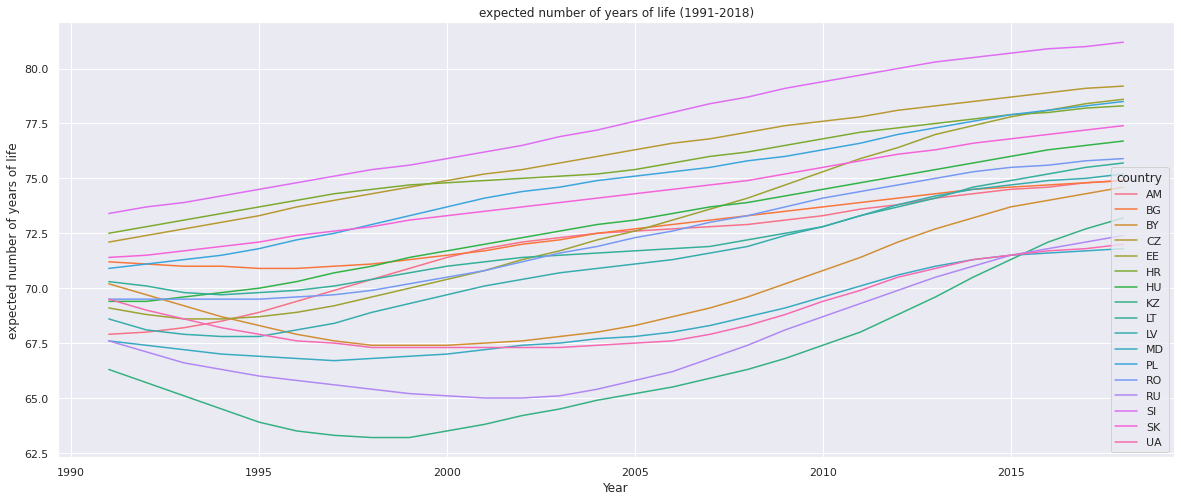

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("expected number of years of life (1991-2018)")
sns.boxenplot(x=df['country'], y=df["expected number of years of life"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("expected number of years of life (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["expected number of years of life"], hue=df["country"], legend=True, ci=None)
plt.ylabel('expected number of years of life')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("workforce (1991-2018)")
sns.boxenplot(x=df['country'], y=df["workforce"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("workforce (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["workforce"], hue=df["country"], legend=True, ci=None)
plt.ylabel('workforce')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("globalization (1991-2018)")
sns.boxenplot(x=df['country'], y=df["globalization"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("globalization (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["globalization"], hue=df["country"], legend=True, ci=None)
plt.ylabel('globalization')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("number of years in the EU (1991-2018)")
sns.boxenplot(x=df['country'], y=df["number of years in the EU"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("number of years in the EU (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["number of years in the EU"], hue=df["country"], legend=True, ci=None)
plt.ylabel('number of years in the EU')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("financialization (1991-2018)")
sns.boxenplot(x=df['country'], y=df["financialization"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("financialization (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["financialization"], hue=df["country"], legend=True, ci=None)
plt.ylabel('financialization')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("CIT (1991-2018)")
sns.boxenplot(x=df['country'], y=df["CIT"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("CIT (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["CIT"], hue=df["country"], legend=True, ci=None)
plt.ylabel('CIT')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("FTW (1991-2018)")
sns.boxenplot(x=df['country'], y=df["FTW"], palette="Set2")


plt.figure(figsize=(20,8))
plt.title("FTW (1991-2018)")
g= sns.lineplot(x=df["year"], y=df["FTW"], hue=df["country"], legend=True, ci=None)
plt.ylabel('FTW')
plt.xlabel('Year')
#plt.legend(fontsize=12 )
sns.set_style("whitegrid")
sns.set_theme()

# WARIANCJA

In [95]:
%%R
alfa = 0.05;k=17;n=dim(df)[1]
qf(1-alfa,k-1,n-k) 

[1] 1.665576


In [105]:
%%R
df_nazwyok

# A tibble: 476 × 18
   country  year Gini_coefficient unemployment GDP_pc female_workforce
   <chr>   <dbl>            <dbl>        <dbl>  <dbl>            <dbl>
 1 AM       1991             34.6         1.60  8142.             49.0
 2 AM       1992             35.5         1.80  4700.             49.0
 3 AM       1993             36.3         5.30  4130.             49.0
 4 AM       1994             37.2         6.60  4393.             48.9
 5 AM       1995             38           6.70  4703.             48.7
 6 AM       1996             38.9         9.30  4811.             48.6
 7 AM       1997             39.3        10.8   4836.             48.5
 8 AM       1998             39.6         9.40  4994.             48.3
 9 AM       1999             39.8        11.2   5000.             48.2
10 AM       2000             39.5        11.1   5140.             48.0
# … with 466 more rows, and 12 more variables: tax_revenue <dbl>,
#   expected_number_of_years_of_education <dbl>, FDI <dbl>,
#

In [100]:
df_UE.groupby(df_UE['country']).describe()

year                                     ...  FTW                     
        count    mean       std     min      25%  ...  min  25%  50%   75%  max
country                                           ...                          
1        28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  1.0  1.0  1.00  1.0
2        28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
3        28.0  2004.5  8.225975  1991.0  1997.75  ...  0.0  0.0  0.0  0.25  1.0
4        28.0  2004.5  8.225975  1991.0  1997.75  ...  2.0  2.0  2.0  2.00  2.0
5        28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
6        28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  1.0  2.0  2.00  2.0
7        28.0  2004.5  8.225975  1991.0  1997.75  ...  2.0  2.0  2.0  2.00  2.0
8        28.0  2004.5  8.225975  1991.0  1997.75  ...  0.0  0.0  0.0  0.00  1.0
9        28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
10       28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
11       28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  1.0  1.0  1.00  1.0
12       28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
13       28.0  2004.5  8.225975  1991.0  1997.75  ...  0.0  2.0  2.0  2.00  2.0
14       28.0  2004.5  8.225975  1991.0  1997.75  ...  0.0  0.0  0.0  1.00  1.0
15       28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
16       28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  2.0  2.0  2.00  2.0
17       28.0  2004.5  8.225975  1991.0  1997.75  ...  1.0  1.0  1.0  1.00  2.0

[17 rows x 152 columns]

In [ ]:
%%R
alfa = 0.05;k=2;n=dim(df)[1]
qf(1-alfa,k-1,n-k) 

[1] 3.861152


In [ ]:
df.rename(columns={'membership of the EU': 'membership_EU'}, inplace=True)
df.to_excel(r'df.xlsx', index = False)

In [ ]:
%%R
df <- read_excel("df.xlsx")

In [ ]:
%%R

av <- aov(membership_EU ~ Gini_coefficient, data=df)
summary(av) 

                  Df Sum Sq Mean Sq F value Pr(>F)
Gini_coefficient   1   0.09 0.09017   0.416  0.519
Residuals        474 102.64 0.21654               


In [ ]:
%%R
alfa = 0.05;k=3;n=dim(df)[1]
qf(1-alfa,k-1,n-k) 

[1] 3.014786


In [ ]:
%%R
av <- aov(FTW ~ Gini_coefficient, data=df)
summary(av) 

                  Df Sum Sq Mean Sq F value Pr(>F)
Gini_coefficient   1   1.35  1.3466   2.669  0.103
Residuals        474 239.12  0.5045               


In [69]:
%%R
alfa = 0.05;k=4;n=dim(df)[1]
qf(1-alfa,k-1,n-k) 

[1] 2.623797


In [70]:
%%R

av <- aov(Gini_coefficient ~ EU_group, data=df_UE)
summary(av) 

             Df Sum Sq Mean Sq F value Pr(>F)  
EU_group      1     84   84.33   3.922 0.0482 *
Residuals   474  10193   21.50                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [73]:
%%R
df_UE

# A tibble: 476 × 20
   country  year Gini_coefficient unemployment GDP_pc female_workforce
     <dbl> <dbl>            <dbl>        <dbl>  <dbl>            <dbl>
 1       1  1991             34.6         1.60  8142.             49.0
 2       1  1992             35.5         1.80  4700.             49.0
 3       1  1993             36.3         5.30  4130.             49.0
 4       1  1994             37.2         6.60  4393.             48.9
 5       1  1995             38           6.70  4703.             48.7
 6       1  1996             38.9         9.30  4811.             48.6
 7       1  1997             39.3        10.8   4836.             48.5
 8       1  1998             39.6         9.40  4994.             48.3
 9       1  1999             39.8        11.2   5000.             48.2
10       1  2000             39.5        11.1   5140.             48.0
# … with 466 more rows, and 14 more variables: tax_revenue <dbl>,
#   expected_number_of_years_of_education <dbl>, FDI <dbl>,
#

In [74]:
%%R
alfa = 0.05;k=2;n=dim(df)[1]
qf(1-alfa,k-1,n-k) 

[1] 3.861152


In [75]:
%%R

av <- aov(Gini_coefficient ~ w_UE, data=df_UE)
summary(av) 

             Df Sum Sq Mean Sq F value   Pr(>F)    
w_UE          1    682   682.4   33.71 1.17e-08 ***
Residuals   474   9595    20.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


SRAWDZAM CZY JEST SENS ZROBIC PANELOWA DLA MAKRO DANYCH Z FIXED EFFECTS - TEST WALDA Konstrukcja modelu postaci (2) będzie miała sens, o ile efekty indywidualne są różne
dla poszczególnych jednostek. Istnieje statystyczny test Walda, który bada istotność
zróżnicowania efektów indywidualnych. W teście tym hipoteza zerowa mówi o braku
zróżnicowania, a statystyka testowa oparta jest na różnicy współczynników determinacji
liniowej w modelach (1) i (2) oszacowanych dla tych samych danych:

> https://ssl-kolegia.sgh.waw.pl/pl/KAE/struktura/ISiD/struktura/ZSS/zaklad/sklad/Documents/WSTEP_DO_EKONOMETRII_DANYCH_PANELOWYCH.pdf

In [76]:
%%R
df_numeryczne

# A tibble: 476 × 18
   country  year `Gini coefficient` unemployment `GDP pc` `female workforce`
   <chr>   <dbl>              <dbl>        <dbl>    <dbl>              <dbl>
 1 AM       1991               34.6         1.60    8142.               49.0
 2 AM       1992               35.5         1.80    4700.               49.0
 3 AM       1993               36.3         5.30    4130.               49.0
 4 AM       1994               37.2         6.60    4393.               48.9
 5 AM       1995               38           6.70    4703.               48.7
 6 AM       1996               38.9         9.30    4811.               48.6
 7 AM       1997               39.3        10.8     4836.               48.5
 8 AM       1998               39.6         9.40    4994.               48.3
 9 AM       1999               39.8        11.2     5000.               48.2
10 AM       2000               39.5        11.1     5140.               48.0
# … with 466 more rows, and 12 more variables: tax_reve

In [93]:
%%R
model <- lm(Gini_coefficient ~ country + year + unemployment + GDP_pc + female_workforce + tax_revenue + expected_number_of_years_of_education + expected_number_of_years_of_life +
            workforce + FDI + globalization + financialization + EU_membership + number_of_years_in_the_EU + CIT + population + FTW, data = df_nazwyok)

summary(model)


Call:
lm(formula = Gini_coefficient ~ country + year + unemployment + 
    GDP_pc + female_workforce + tax_revenue + expected_number_of_years_of_education + 
    expected_number_of_years_of_life + workforce + FDI + globalization + 
    financialization + EU_membership + number_of_years_in_the_EU + 
    CIT + population + FTW, data = df_nazwyok)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6618 -0.7671  0.1438  0.9541  3.3166 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.839e+02  1.069e+02   1.720 0.086082
countryBG                             -8.189e+00  8.294e-01  -9.873  < 2e-16
countryBY                             -1.676e+01  1.098e+00 -15.269  < 2e-16
countryCZ                             -1.859e+01  1.452e+00 -12.804  < 2e-16
countryEE                             -9.377e+00  1.029e+00  -9.109  < 2e-16
countryHR                             -1.043e+01  1.078e+00  -9.676  < 2e-16
coun

In [110]:
%%R
model1 <- lm(Gini_coefficient ~ country + year + unemployment + female_workforce + tax_revenue + expected_number_of_years_of_life +
            workforce + financialization + EU_membership + number_of_years_in_the_EU + CIT + population + FTW, data = df_UE)

summary(model1)


Call:
lm(formula = Gini_coefficient ~ country + year + unemployment + 
    female_workforce + tax_revenue + expected_number_of_years_of_life + 
    workforce + financialization + EU_membership + number_of_years_in_the_EU + 
    CIT + population + FTW, data = df_UE)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6213 -1.7042 -0.0079  1.6900  7.6744 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.517e+02  5.158e+01  -6.819 2.87e-11 ***
country                          -4.629e-01  3.507e-02 -13.200  < 2e-16 ***
year                              2.178e-01  2.618e-02   8.318 1.01e-15 ***
unemployment                      1.276e-01  3.203e-02   3.984 7.86e-05 ***
female_workforce                  4.913e-01  6.042e-02   8.131 3.95e-15 ***
tax_revenue                      -1.267e-01  2.640e-02  -4.798 2.17e-06 ***
expected_number_of_years_of_life -5.174e-01  6.920e-02  -7.476 3.87e-13 ***
workforce       

In [125]:
%%R
wald.test(Sigma = vcov(model1), b = coef(model1), Terms = 1:12)
#https://ssl-kolegia.sgh.waw.pl/pl/KAE/struktura/ISiD/struktura/ZSS/zaklad/sklad/Documents/WSTEP_DO_EKONOMETRII_DANYCH_PANELOWYCH.pdf
#odrzucamy h1, możemy robic fixed
#https://www.statology.org/wald-test-in-r/

Wald test:
----------

Chi-squared test:
X2 = 8559.5, df = 12, P(> X2) = 0.0


In [217]:
#szukam fixed effects dla państwa
#DUMMY VARIABLE estimation
#every singla time pirod + cross section unit (country)
%%R
dummyvar = lm(Gini_coefficient ~ unemployment + GDP_pc + female_workforce + tax_revenue + expected_number_of_years_of_education + expected_number_of_years_of_life +
            workforce + FDI + globalization + financialization + EU_membership + number_of_years_in_the_EU + CIT + population + FTW + factor(year) + factor(country), data = df_UE)
summary(dummyvar)
#rok 1991 i country 1 to base group
#tzn ze dane "estimate odnoszą się do roku 1991  i kraju 1" tzn ze dane dla 1992 pokazuja
#środku w roku 1992 zmiana w stosunku do roku 1991 wynosila 0,866 itd



Call:
lm(formula = Gini_coefficient ~ unemployment + GDP_pc + female_workforce + 
    tax_revenue + expected_number_of_years_of_education + expected_number_of_years_of_life + 
    workforce + FDI + globalization + financialization + EU_membership + 
    number_of_years_in_the_EU + CIT + population + FTW + factor(year) + 
    factor(country), data = df_UE)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6180 -0.7929 -0.0010  0.7595  3.2401 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            5.510e+01  6.234e+00   8.839  < 2e-16
unemployment                           2.156e-02  2.424e-02   0.889  0.37437
GDP_pc                                 1.285e-04  4.830e-05   2.661  0.00810
female_workforce                      -3.428e-01  6.123e-02  -5.598 3.93e-08
tax_revenue                           -8.377e-03  1.863e-02  -0.450  0.65317
expected_number_of_years_of_education  1.815e-01  1.377e-01   1.318  0

#rok przestaje byc istotny dla roku 2007

In [ ]:
%%R
install.packages("plm")
library(plm)
#plm  panel linear model


In [280]:
%%R
#wywalam FDI, globalization, number_of_years_of_education,  number_of_years_in_the_EU, tax_revenue, population
#expected_number_of_years_of_education, unemployment
within = plm(Gini_coefficient ~  GDP_pc + female_workforce + expected_number_of_years_of_life +
workforce + financialization + EU_membership + CIT + FTW + factor(year), index="country", model="within", data = df_UE)
summary(within)

Oneway (individual) effect Within Model

Call:
plm(formula = Gini_coefficient ~ GDP_pc + female_workforce + 
    expected_number_of_years_of_life + workforce + financialization + 
    EU_membership + CIT + FTW + factor(year), data = df_UE, model = "within", 
    index = "country")

Balanced Panel: n = 17, T = 28, N = 476

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-6.656012 -0.813706  0.026514  0.717243  3.250117 

Coefficients:
                                    Estimate  Std. Error t-value  Pr(>|t|)    
GDP_pc                            1.4456e-04  3.5534e-05  4.0682 5.652e-05 ***
female_workforce                 -3.8948e-01  5.4099e-02 -7.1994 2.773e-12 ***
expected_number_of_years_of_life -4.4522e-01  7.6097e-02 -5.8507 9.797e-09 ***
workforce                         4.1013e-01  5.7523e-02  7.1299 4.360e-12 ***
financialization                 -3.0090e+00  1.3227e+00 -2.2749 0.0234083 *  
EU_membership                     2.3468e+00  2.5009e-01  9.3838 < 2.2e-16

# DZIELE NA 2 GRUPY 1991-2006 I 2007-2018

In [302]:
url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/1991_2005.xlsx')
df_05 = pd.read_excel(url_data)
df_05.to_excel(r'df_05.xlsx', index = False)
#df.drop(['Bezepieczeństwo'], axis = 1, inplace = True, errors = 'ignore')

url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/2006_2018.xlsx')
df_18 = pd.read_excel(url_data)

#df.to_excel(r'df.xlsx', index = False)


url_data = (r'https://raw.github.com/monixan/grape/main/grape_dane/podzial0718.xlsx')
podzial = pd.read_excel(url_data)
podzial.to_excel(r'podzial.xlsx', index = False)


In [303]:
%%R
podzial = read_excel('podzial.xlsx')

In [304]:
%%R
alfa = 0.05;k=2;n=dim(podzial)[1]
qf(1-alfa,k-1,n-k) 


[1] 3.861152


In [305]:
%%R
av <- aov(Gini_coefficient ~ podzial, data=podzial)
summary(av) 

             Df Sum Sq Mean Sq F value Pr(>F)  
podzial       1     71   71.40   3.316 0.0692 .
Residuals   474  10206   21.53                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [306]:
df_06.drop(['EU_group', 'EU_membership', 'w_UE', 'unemployment', 'number_of_years_in_the_EU', 'FDI', 'globalization', 'financialization', 'GDP_pc'], axis = 1, inplace = True, errors = 'ignore')


X = df_06.iloc[:, df_06.columns != "Gini_coefficient"]
Y = df_06["Gini_coefficient"].values.reshape(-1,1)
linear_regressor = LinearRegression().fit(X, Y)
Y_pred = linear_regressor.predict(X)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     45.88
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           6.27e-49
Time:                        02:42:57   Log-Likelihood:                -684.03
No. Observations:                 272   AIC:                             1388.
Df Residuals:                     262   BIC:                             1424.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [307]:
df_18.drop(['EU_group', 'w_UE', 'expected_number_of_years_of_education', 'GDP_pc', 'FDI'], axis = 1, inplace = True, errors = 'ignore')


X = df_18.iloc[:, df_18.columns != "Gini_coefficient"]
Y = df_18["Gini_coefficient"].values.reshape(-1,1)
linear_regressor = LinearRegression().fit(X, Y)
Y_pred = linear_regressor.predict(X)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     71.10
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           8.74e-71
Time:                        02:42:57   Log-Likelihood:                -446.77
No. Observations:                 221   AIC:                             923.5
Df Residuals:                     206   BIC:                             974.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [232]:
%%R
within = plm(Gini_coefficient ~  GDP_pc + female_workforce + expected_number_of_years_of_life +
workforce + financialization + EU_membership + CIT + FTW + factor(year), index="country", model="within", data = df_06)
summary(within)

Oneway (individual) effect Within Model

Call:
plm(formula = Gini_coefficient ~ GDP_pc + female_workforce + 
    expected_number_of_years_of_life + workforce + financialization + 
    EU_membership + CIT + FTW + factor(year), data = df_06, model = "within", 
    index = "country")

Balanced Panel: n = 17, T = 16, N = 272

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-5.150174 -0.556588 -0.082045  0.502058  2.913160 

Coefficients:
                                    Estimate  Std. Error t-value  Pr(>|t|)    
GDP_pc                           -1.5578e-04  6.4795e-05 -2.4041 0.0169955 *  
female_workforce                 -1.4050e-01  9.3446e-02 -1.5036 0.1340450    
expected_number_of_years_of_life  6.8979e-02  1.0753e-01  0.6415 0.5218484    
workforce                        -7.7068e-02  1.0247e-01 -0.7521 0.4527647    
financialization                 -4.9015e-02  1.4486e+00 -0.0338 0.9730368    
EU_membership                     1.5982e+00  3.6558e-01  4.3718 1.861e-05